# <span style="color:#bce35b;font-size:35px"><b>Week 9 & 10</b></span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<span style="color:#8c8c8c">Patrick Weatherford</span>

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

***
***

Importing libraries

In [1]:
from datetime import date, datetime as dttm, timedelta
from pprint import pprint
# from contextlib import closing
from dask import dataframe as dd, bag as db, array as da
# import sqlite3
# from fuzzywuzzy import fuzz, process
# import lxml
from bs4 import BeautifulSoup
# import sys
# import scipy
# import io
# import math
import re
# from itertools import permutations, dropwhile, zip_longest
# from collections import deque as deq
import requests
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import keyring
from http import HTTPStatus
import API_Keys
from IPython.display import Image
import tweepy
# import seaborn as sns

os.environ['KAGGLE_USERNAME'] = 'hakunapatata'
os.environ['KAGGLE_KEY'] = keyring.get_password(
    service_name='kaggle_api', username=os.environ['KAGGLE_USERNAME'])


%matplotlib inline

# matplotlib default settings
plt.style.use('dark_background')
mpl.rcParams.update({'lines.linewidth': 3})
mpl.rcParams.update({'axes.labelsize': 14})
mpl.rcParams.update({'axes.titlesize': 16})
mpl.rcParams.update({'axes.titleweight': 'bold'})
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams.update(
    {'axes.grid': True, 'grid.color': '#424242', 'grid.linestyle': '--'})

# creation random number generator object
rng_seed = 777
rng = np.random.default_rng(rng_seed)

# pandas dataframe options
pd.set_option('display.max_columns', None)


In [2]:
# see list of current settings
# plt.rcParams.keys()


<br>

Import custom module <br><br>
<span style="font-size:13px">~/Bellevue_University/Python/HakunaPatata.py</span>

In [3]:

rel_path_parts = os.getcwd().split(os.sep)
rel_path = ''

for count, dir in enumerate(rel_path_parts):
    if count == 0:
        rel_path = rel_path + f"{dir}"
    else:
        rel_path = rel_path + f"\\{dir}"

    if dir == "Bellevue_University":
        break
    else:
        continue

custom_mod_path = rel_path + f"\\Python"
class_path = rel_path + f"\\DSC 540 - Data Preparation"

os.chdir(custom_mod_path)  # change cwd to directory with custom Python module (~/Bellevue_University/Python/HakunaPatata.py)

import HakunaPatata as HP

os.chdir(class_path)  # once imported, change back to class working directory.

<br>

***

# <span style="color:#bce35b">Week Activities</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

<br>

***

## <span style="color:#ae8bd5">Activity 9</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

Top 100 eBooks from Gutenberg (previous day)

In [4]:
url = r'https://www.gutenberg.org/browse/scores/top'

s = requests.Session()
r = s.get(url, timeout=10)

print(f"Connection status: {HTTPStatus(r.status_code).phrase}")

Connection status: OK


<br>

Looks like I need to pull all of the list elements under the h2 (header#2) tag where the id for the h2 tag is 'books-last1'. Then get the child \<li> tags for the parent \<ol> tag which is a sibling to the \<h2> tag.

In [5]:
soup = BeautifulSoup(r.text, 'lxml')

top100_yesterday_li = soup.find('h2', id="books-last1").find_next_sibling('ol').find_all('li')

top100_yesterday = []

for rank, li in enumerate(top100_yesterday_li, start=1):
    book_num = re.search(r'\d+', li.a.get('href')).group()
    book_name = re.sub(r'\(\d+\)', '', li.a.text)
    book_link = f"https://www.gutenberg.org/ebooks/{book_num}"
    top100_yesterday.append( (rank, book_num, book_name, book_link) )

top_100_yesterday_df = pd.DataFrame(top100_yesterday, columns=['RANK','BOOK_NUM','BOOK_NAME','BOOK_LINK'], ).set_index('RANK')

top_100_yesterday_df


,BOOK_NUM,BOOK_NAME,BOOK_LINK
RANK,,,
1,1342,Pride and Prejudice by Jane Austen,https://www.gutenberg.org/ebooks/1342
2,84,"Frankenstein; Or, The Modern Prometheus by Mar...",https://www.gutenberg.org/ebooks/84
3,11,Alice's Adventures in Wonderland by Lewis Carr...,https://www.gutenberg.org/ebooks/11
4,64317,The Great Gatsby by F. Scott Fitzgerald,https://www.gutenberg.org/ebooks/64317
5,68096,"Fifty years hence: or, What May Be in 1943: A ...",https://www.gutenberg.org/ebooks/68096
...,...,...,...
96,2680,Meditations by Emperor of Rome Marcus Aurelius,https://www.gutenberg.org/ebooks/2680
97,16328,Beowulf: An Anglo-Saxon Epic Poem,https://www.gutenberg.org/ebooks/16328
98,829,Gulliver's Travels into Several Remote Nations...,https://www.gutenberg.org/ebooks/829


<br>

***

## <span style="color:#ae8bd5">Activity 10</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

Building Movie Database API

In [6]:
def search_movie(api_key, movie_title, media_type='movie', plot_output='short', year=None):
    
    url = f"http://www.omdbapi.com/"

    payload = {
        'apikey':api_key
        ,'t':f"{movie_title}"
        ,'type':media_type
        ,'plot':plot_output
        ,'y':year
    }

    s = requests.Session()
    r = s.get(url, timeout=10, params=payload)

    print(f"Connection status: {HTTPStatus(r.status_code).phrase}")

    json_dict = r.json()

    for k in json_dict.keys():
        if k.upper() == 'RATINGS':
            print(f"{k.upper()}")
            for rating in json_dict[k]:
                print(f"\t- {rating['Source']}: {rating['Value']}")
            print(f"")
        else:
            print(f"{k.upper()}: {json_dict[k]}")


    return Image(r.json()['Poster'])

    

Connection status: OK
TITLE: Napoleon Dynamite
YEAR: 2004
RATED: PG
RELEASED: 27 Aug 2004
RUNTIME: 96 min
GENRE: Comedy
DIRECTOR: Jared Hess
WRITER: Jared Hess, Jerusha Hess
ACTORS: Jon Heder, Efren Ramirez, Jon Gries
PLOT: A listless and alienated teenager decides to help his new friend win the class presidency in their small western high school, while he must deal with his bizarre family life back home.
LANGUAGE: English
COUNTRY: United States
AWARDS: 10 wins & 23 nominations
POSTER: https://m.media-amazon.com/images/M/MV5BNjYwNTA3MDIyMl5BMl5BanBnXkFtZTYwMjIxNjA3._V1_SX300.jpg
RATINGS
	- Internet Movie Database: 6.9/10
	- Rotten Tomatoes: 72%
	- Metacritic: 64/100

METASCORE: 64
IMDBRATING: 6.9
IMDBVOTES: 213,840
IMDBID: tt0374900
TYPE: movie
DVD: 21 Dec 2004
BOXOFFICE: $44,540,956
PRODUCTION: N/A
WEBSITE: N/A
RESPONSE: True


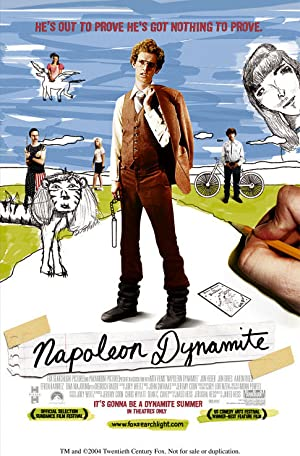

In [7]:
search_movie(api_key=API_Keys.OMDb_api_key, movie_title='Napoleon Dynamite')

<br>

***

## <span style="color:#ae8bd5">Connect to the Twitter API</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

In [8]:
def get_username_tweets(bearer_token, username, num_tweets=10, exclude=None, tweet_fields=None):
    client = tweepy.Client(bearer_token=bearer_token)

    user_search = client.get_user(username=username).data

    user_id = user_search.id
    user_name = user_search.name
    user_username = user_search.username

    if tweet_fields is None:
        tweet_fields = ['created_at']
    elif 'created_at' in tweet_fields:
        pass
    else:
        tweet_fields = tweet_fields.append('created_at')

    tweets = client.get_users_tweets(
        id=user_id, max_results=num_tweets, exclude=exclude, tweet_fields=tweet_fields)

    print(f"""
{'='*80}
USER: {user_name}
USER_NAME: {user_username}
USER_ID: {user_id}
{'='*80}""")

    for tweet in tweets.data:
        print(f"""
Tweet ID: {tweet.id}
Created: {tweet.created_at}
        
{tweet.text}
{'_'*80}""")


In [9]:
bearer_token = API_Keys.Twitter_bearer_token
search = 'Eagles'

get_username_tweets(bearer_token=bearer_token, username=search, num_tweets=15, exclude=['retweets','replies'])


USER: Philadelphia Eagles
USER_NAME: Eagles
USER_ID: 180503626

Tweet ID: 1526678946120622083
Created: 2022-05-17 21:39:59+00:00
        
Roster Move: Eagles have claimed WR Josh Hammond off of waivers.

#FlyEaglesFly https://t.co/8hB1X45k51
________________________________________________________________________________

Tweet ID: 1526658757320646656
Created: 2022-05-17 20:19:46+00:00
        
Always competing 

#FlyEaglesFly https://t.co/6gN1Ps7osC
________________________________________________________________________________

Tweet ID: 1526634858327461888
Created: 2022-05-17 18:44:48+00:00
        
The Rookie and the Vet 

#FlyEaglesFly https://t.co/tfrkvuJo4W
________________________________________________________________________________

Tweet ID: 1526627349260914689
Created: 2022-05-17 18:14:58+00:00
        
STRAIGHT BUSINESS🤫

#FlyEaglesFly https://t.co/4eKqd5XwRR
________________________________________________________________________________

Tweet ID: 1526618149294153730

<br>

***

## <span style="color:#ae8bd5">Metropolitan Museum Visualizations</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

In [10]:
db_path = 'HakunaPatata.db'

HP.sqlite_tables(db_path=db_path)

,TABLE_NAME
0,PATIENT
1,MET_MUSEUM
2,COUNTRY_YEAR_CANCER_DEATHS
3,COUNTRY_SUN_HRS
4,SUNSPOTS


In [11]:
sql_txt = r"""
SELECT * FROM (
SELECT 
    MM."Object Number" AS OBJECT_NUMBER
    , MM."AccessionYear" AS ACCESSION_YEAR
    , MM."Object Name" AS OBJECT_NAME
    , MM."Title" AS TITLE
    , MM."Object Date" AS OBJECT_DATE
    , MM."Object Begin Date" AS OBJECT_BEGIN_DATE
    , CASE 
        WHEN SUBSTR('0000' || RTRIM("MM"."Object Begin Date"), LENGTH('0000' || RTRIM("MM"."Object Begin Date"))-3, 4) = '0000' THEN 0
        ELSE CASE
            WHEN CAST(RTRIM("MM"."Object Begin Date") AS INT) = 0 THEN NULL
            ELSE CAST(RTRIM("MM"."Object Begin Date") AS INT)
        END
    END AS "OBJECT_BEGIN_DATE_NUM"
    , MM."Object End Date" AS OBJECT_END_DATE
    , CASE
        WHEN SUBSTR('0000' || RTRIM("MM"."Object End Date"), LENGTH('0000' || RTRIM("MM"."Object End Date"))-3, 4) = '0000' THEN 0
        ELSE CASE
            WHEN CAST(RTRIM("MM"."Object End Date") AS INT) = 0 THEN NULL
            ELSE CAST(RTRIM("MM"."Object End Date") AS INT)
        END
    END AS "OBJECT_END_DATE_NUM"
    , MM."Artist Alpha Sort" AS ARTIST_NAME
    , MM."Artist Gender" AS ARTIST_GENDER
    , MM."Artist Nationality" AS ARTIST_NATIONALITY
    , MM."Credit Line" AS CREDIT_LINE
    , MM."Dimensions" AS DIMENSIONS
    , MM."Medium" AS MEDIUM
    , MM."Classification" AS CLASSIFICATION
    , MM."Department" AS DEPARTMENT
    , MM."Culture" AS CULTURE

FROM MET_MUSEUM AS MM
WHERE 
    MM."AccessionYear" <> 'None' AND REPLACE(MM."AccessionYear", ' ', '')<>'' -- should exclude Null values too
) "MAIN" 
WHERE 
    "MAIN".OBJECT_BEGIN_DATE >= 0 AND "MAIN".OBJECT_BEGIN_DATE < CAST(STRFTIME('%Y', (DATE('now'))) AS INT)
"""

mm_df = HP.sql_to_df(db_path, sql_txt=sql_txt)

<br>

Line plot of art pieces:

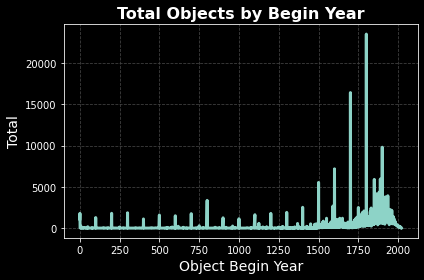

In [12]:
mm_df.groupby('OBJECT_BEGIN_DATE_NUM')['OBJECT_BEGIN_DATE_NUM'].count().plot(xlabel='Object Begin Year', ylabel='Total', title='Total Objects by Begin Year')
plt.show()

<br>

Bar chart of totals by classification

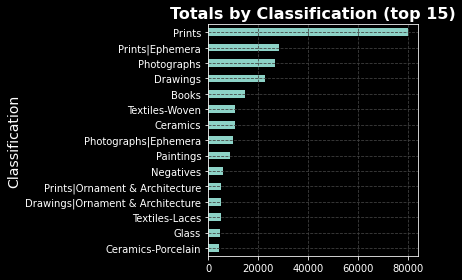

In [13]:
mm_df.groupby('CLASSIFICATION')['CLASSIFICATION'].count().sort_values(ascending=False).head(15).sort_values(
).plot.barh(title='Totals by Classification (top 15)', xlabel='Classification', ylabel='Total')
plt.show()


<br>

Histogram of frequency of totals by object begin year.

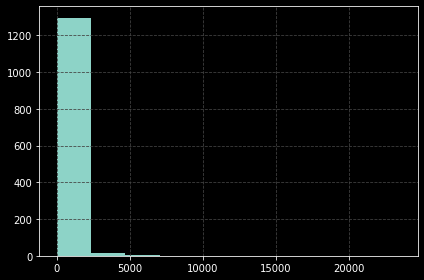

In [14]:
mm_df.groupby('OBJECT_BEGIN_DATE_NUM')['OBJECT_BEGIN_DATE_NUM'].count().hist()
plt.show()

<br>

Density Plot of frequency of totals by object begin year.

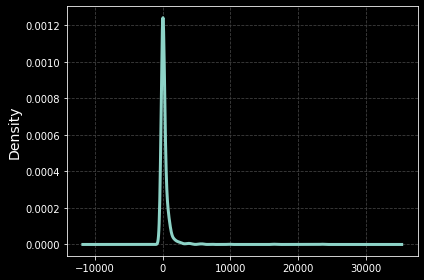

In [15]:
mm_df.groupby('OBJECT_BEGIN_DATE_NUM')['OBJECT_BEGIN_DATE_NUM'].count().plot(kind='kde')
plt.show()